In [2]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to my database
# Database connection parameters
conn = psycopg2.connect(
    host="",
    port="",  
    database="",  
    user="",  
    password=""  
)

cursor = conn.cursor()

In [3]:
# Query to retrieve UCLA offensive stats along with weather, altitude, and distance
query = """
SELECT date, raw_location, opponent, 
       passing_cmp, passing_att, completion_pct, passing_yds, passing_td, 
       rushing_att, rushing_yds, rushing_avg, rushing_td, total_plays, total_yards, avg_yds,
       pass_first_downs, rush_first_downs, first_down_pens, total_first_downs, 
       total_penalties, total_penalties_yds, total_fum, total_int, total_to,
       temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM Washington_Offensive_Stats;
"""

uw_data = pd.read_sql(query, conn)

# Display the first few rows of the data
uw_data.head()

/var/folders/d0/gj8tfnxn3jd2gjx88tk4mp180000gn/T/ipykernel_54433/2949883721.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  uw_data = pd.read_sql(query, conn)


,date,raw_location,opponent,passing_cmp,passing_att,completion_pct,passing_yds,passing_td,rushing_att,rushing_yds,...,total_penalties,total_penalties_yds,total_fum,total_int,total_to,temp_f,precipitation_in,windspeed_mph,altitude_m,distance_from
0,2021-09-18,H,Arkansas State,25,44,56.8,398,3,39,200,...,6,57,1,2,3,56.3,0.203,14.9,53.0,0.00
1,2023-09-02,H,Boise State,31,42,73.8,490,6,19,78,...,5,60,0,0,0,65.7,0.000,5.8,53.0,0.00
2,2023-09-09,H,Tulsa,30,40,75.0,454,3,22,109,...,7,93,1,1,2,67.7,0.000,10.2,53.0,0.00
3,2023-09-16,@,Michigan State,29,39,74.4,536,4,33,177,...,11,110,0,1,1,61.4,0.000,8.9,262.0,1859.35
4,2023-09-23,H,California,23,32,71.9,389,4,30,140,...,9,83,0,1,1,56.3,0.000,17.1,53.0,0.00


In [4]:
# Define distance ranges (you can adjust these as needed)
bins = [0, 400, 750, 1000, 1500, 4000]
labels = ['<400', '400-750', '750-1000', '1000-1500', '1500']

# Create a new column for distance categories
uw_data['Distance_Range'] = pd.cut(uw_data['distance_from'], bins=bins, labels=labels, right=False)

# Group by distance range and calculate mean values for the metrics
distance_grouped = uw_data.groupby('Distance_Range').agg({
    'passing_yds': 'mean',
    'rushing_yds': 'mean',
    'total_yards': 'mean',
    'completion_pct': 'mean',
    'passing_td': 'mean',
    'rushing_att': 'mean',
    'passing_att': 'mean',   # Include passing_att here
    'rushing_td': 'mean',
    'total_first_downs': 'mean',
    'total_to': 'mean'
}).reset_index()

# Display the grouped data
distance_grouped.head()


/var/folders/d0/gj8tfnxn3jd2gjx88tk4mp180000gn/T/ipykernel_54433/3308859094.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_grouped = uw_data.groupby('Distance_Range').agg({


,Distance_Range,passing_yds,rushing_yds,total_yards,completion_pct,passing_td,rushing_att,passing_att,rushing_td,total_first_downs,total_to
0,<400,261.333333,179.632184,440.965517,65.887356,2.045977,37.229885,31.045977,2.356322,22.264368,1.218391
1,400-750,231.187500,142.687500,373.875000,63.106250,1.750000,34.687500,30.687500,1.125000,20.437500,0.937500
2,750-1000,253.923077,157.153846,411.076923,62.207692,1.846154,37.923077,35.538462,1.846154,21.923077,1.461538
3,1000-1500,259.500000,146.600000,406.100000,61.500000,1.100000,36.800000,35.100000,2.200000,21.700000,1.400000
4,1500,295.500000,134.166667,429.666667,60.933333,1.500000,33.166667,37.083333,1.250000,21.666667,1.250000


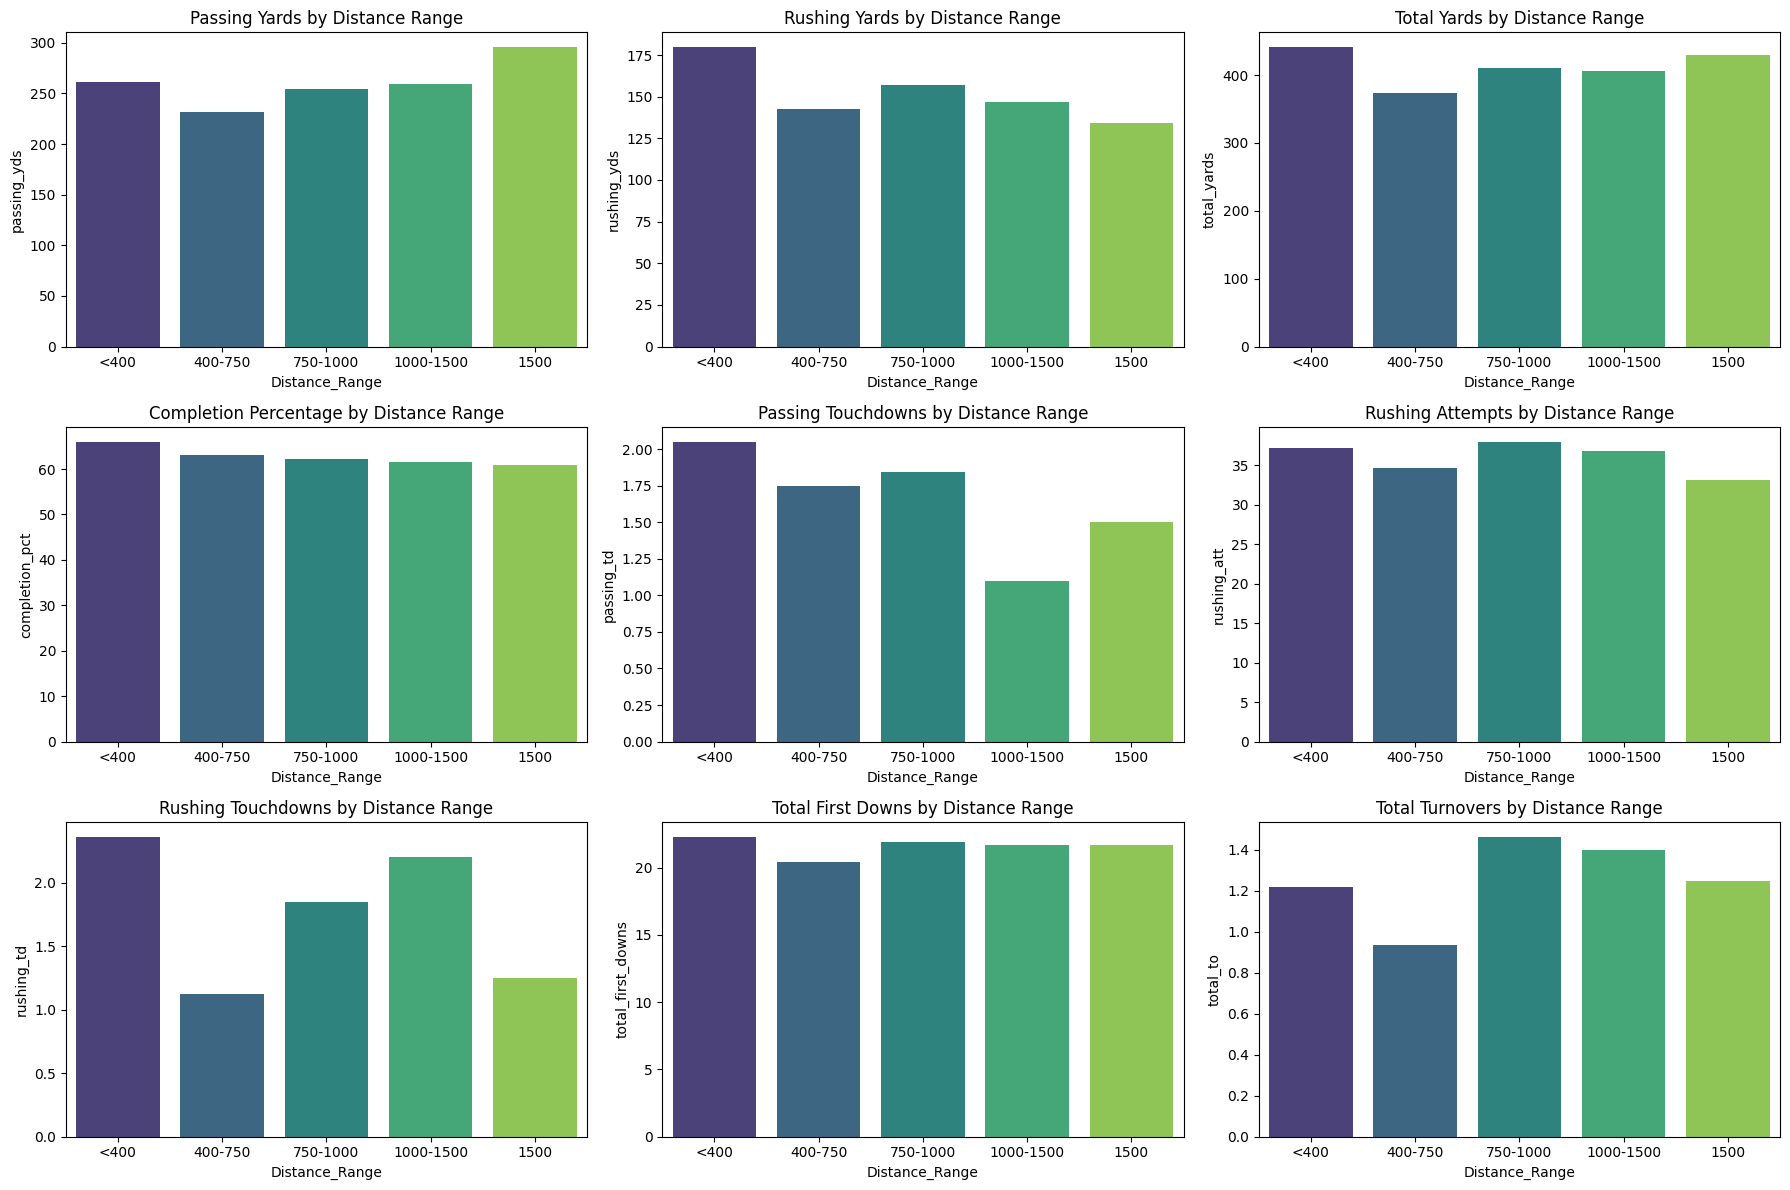

In [5]:
# Set up the plot
fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Passing Yards
sns.barplot(x='Distance_Range', y='passing_yds', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 0], legend=False)
axs[0, 0].set_title('Passing Yards by Distance Range')

# Rushing Yards
sns.barplot(x='Distance_Range', y='rushing_yds', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 1], legend=False)
axs[0, 1].set_title('Rushing Yards by Distance Range')

# Total Yards
sns.barplot(x='Distance_Range', y='total_yards', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 2], legend=False)
axs[0, 2].set_title('Total Yards by Distance Range')

# Completion Percentage
sns.barplot(x='Distance_Range', y='completion_pct', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 0], legend=False)
axs[1, 0].set_title('Completion Percentage by Distance Range')

# Passing Touchdowns
sns.barplot(x='Distance_Range', y='passing_td', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 1], legend=False)
axs[1, 1].set_title('Passing Touchdowns by Distance Range')

# Rushing Attempts
sns.barplot(x='Distance_Range', y='rushing_att', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 2], legend=False)
axs[1, 2].set_title('Rushing Attempts by Distance Range')

# Rushing Touchdowns
sns.barplot(x='Distance_Range', y='rushing_td', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 0], legend=False)
axs[2, 0].set_title('Rushing Touchdowns by Distance Range')

# Total First Downs
sns.barplot(x='Distance_Range', y='total_first_downs', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 1], legend=False)
axs[2, 1].set_title('Total First Downs by Distance Range')

# Total Turnovers
sns.barplot(x='Distance_Range', y='total_to', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 2], legend=False)
axs[2, 2].set_title('Total Turnovers by Distance Range')

# Adjust layout
plt.tight_layout()
plt.show()



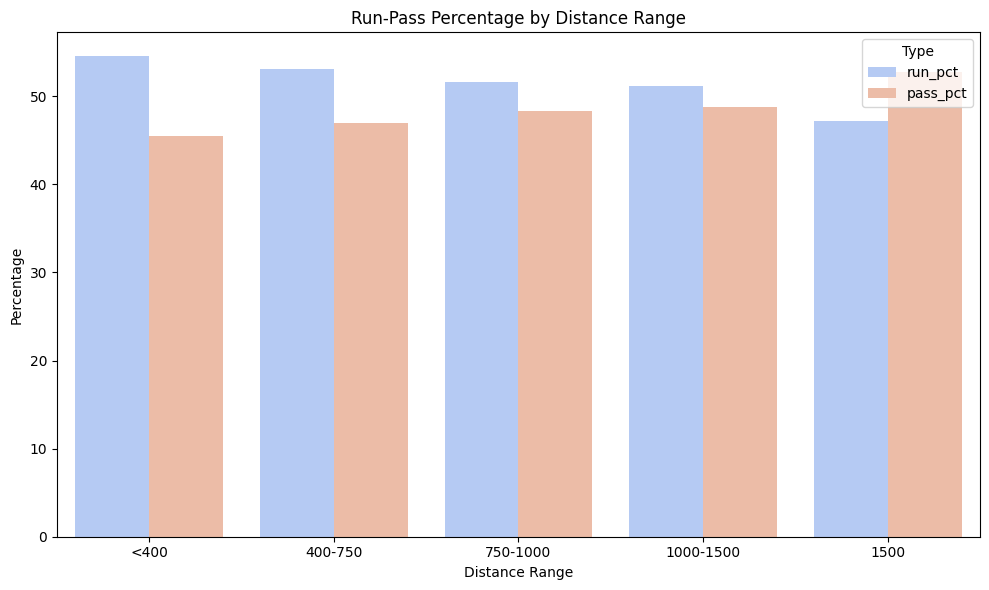

In [6]:
# Calculate Run-Pass Percentage
distance_grouped['run_pct'] = distance_grouped['rushing_att'] / (distance_grouped['rushing_att'] + distance_grouped['passing_att']) * 100
distance_grouped['pass_pct'] = distance_grouped['passing_att'] / (distance_grouped['rushing_att'] + distance_grouped['passing_att']) * 100

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Run and Pass Percentages side by side
distance_grouped_melted = pd.melt(distance_grouped, id_vars=['Distance_Range'], value_vars=['run_pct', 'pass_pct'], var_name='Type', value_name='Percentage')

sns.barplot(x='Distance_Range', y='Percentage', hue='Type', data=distance_grouped_melted, palette='coolwarm')

# Add titles and labels
ax.set_title('Run-Pass Percentage by Distance Range')
ax.set_ylabel('Percentage')
ax.set_xlabel('Distance Range')

# Display the plot
plt.tight_layout()
plt.show()